In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score

In [64]:
data = np.genfromtxt(r'S:\Coursera\Введение в машинное обучение\Неделя 3\Метрики\classification.csv', delimiter=',', skip_header=1)
data

array([[1., 0.],
       [1., 1.],
       [1., 1.],
       [0., 0.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [0., 1.],
       [0., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 1.],
       [0., 1.],
       [0., 0.],
       [0., 1.],
       [1., 1.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [1., 1.],
       [1., 1.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [1., 1.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [0., 1.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 1.],
       [0., 1.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [1., 1.],
       [1., 0.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [68]:
data_pd = pd.read_csv(r'S:\Coursera\Введение в машинное обучение\Неделя 3\Метрики\classification.csv', header=0)
data_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   true    200 non-null    int64
 1   pred    200 non-null    int64
dtypes: int64(2)
memory usage: 3.2 KB


In [18]:
y = data[:, 0]
preds = data[:, 1]

In [4]:
data_pd.iloc[0,1]

0

In [72]:
arr = []
length = data.shape[0]

for i in range(length):
    if data[i,0] == 1 and data[i,1] == 1:
        s = 'TP'
        arr.append(s)
    if data[i,0] == 0 and data[i,1] == 0:
        s = 'TN'
        arr.append(s)
    if data[i,0] == 1 and data[i,1] == 0:
        s = 'FN'
        arr.append(s)
    if data[i,0] == 0 and data[i,1] == 1:
        s = 'FP'
        arr.append(s)

In [73]:
arr = pd.DataFrame(arr, columns=['PR'])
arr.value_counts()

PR
TN    64
FN    59
TP    43
FP    34
dtype: int64

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [28]:
acc = accuracy_score(y, preds)

In [29]:
p = precision_score(y, preds)

In [30]:
r = recall_score(y, preds)

In [31]:
f1 = f1_score(y, preds)

In [32]:
metrics = [acc, p, r, f1]
for i in metrics:
    print(round(i, 2), end=' ')

0.54 0.56 0.42 0.48 

In [37]:
data_scores = np.genfromtxt(r'S:\Coursera\Введение в машинное обучение\Неделя 3\Метрики\scores.csv', delimiter=',', skip_header=1)
data_scores_pd = pd.read_csv(r'S:\Coursera\Введение в машинное обучение\Неделя 3\Метрики\scores.csv', header=0)


In [38]:
from sklearn.metrics import roc_auc_score

In [39]:
data_scores_pd

,true,score_logreg,score_svm,score_knn,score_tree
0,0,0.683832,0.145976,0.787063,0.500000
1,1,0.801966,0.239511,1.000000,0.833333
2,0,0.382315,-0.245701,0.000000,0.000000
3,1,0.506797,-0.137058,0.000000,0.105263
4,1,0.488781,-0.154148,0.000000,0.105263
...,...,...,...,...,...
195,0,0.573801,-0.088203,0.284192,0.400000
196,0,0.624422,-0.012315,0.205437,0.400000
197,1,0.425538,-0.135673,0.382351,0.700000
198,0,0.905270,0.583806,1.000000,1.000000


In [45]:
y = data_scores[:, 0]
score_logreg = data_scores[:, 1]
score_svm = data_scores[:, 2]
score_knn = data_scores[:, 3]
score_tree = data_scores[:, 4]
metrics_proba = [score_logreg, score_svm, score_knn, score_tree]

In [47]:
max_score = 0
for i in metrics_proba:
    score = roc_auc_score(y, i)
    print(score)
    if score > max_score:
        max_score = score
print('максимальная площадь', round(max_score, 2))
    

0.719187675070028
0.7086834733893557
0.6351540616246498
0.6919267707082833
максимальная площадь 0.72


In [58]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt



In [59]:
prc = precision_recall_curve(y, score_logreg)
prc

(array([0.49746193, 0.49489796, 0.49230769, 0.49484536, 0.49740933,
        0.49479167, 0.4973822 , 0.49473684, 0.4973545 , 0.5       ,
        0.5026738 , 0.5       , 0.4972973 , 0.5       , 0.50273224,
        0.50549451, 0.50828729, 0.51111111, 0.51396648, 0.51685393,
        0.51977401, 0.52272727, 0.52571429, 0.52873563, 0.53179191,
        0.53488372, 0.5380117 , 0.53529412, 0.53846154, 0.54166667,
        0.54491018, 0.54819277, 0.55151515, 0.54878049, 0.55214724,
        0.54938272, 0.55279503, 0.55625   , 0.55974843, 0.55696203,
        0.56050955, 0.56410256, 0.56129032, 0.56493506, 0.56862745,
        0.56578947, 0.56953642, 0.56666667, 0.5704698 , 0.57432432,
        0.57142857, 0.57534247, 0.57241379, 0.57638889, 0.58041958,
        0.58450704, 0.58156028, 0.58571429, 0.58992806, 0.58695652,
        0.59124088, 0.59558824, 0.6       , 0.59701493, 0.60150376,
        0.60606061, 0.60305344, 0.6       , 0.60465116, 0.609375  ,
        0.61417323, 0.61111111, 0.616     , 0.62

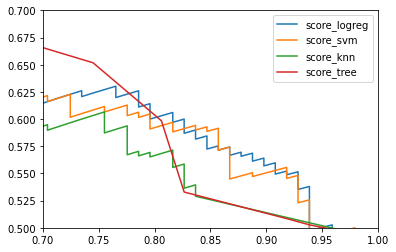

In [60]:
for algorythm in data_scores_pd.columns[1:]:
    yscores = data_scores_pd[algorythm]    
    precision, recall, thresholds = precision_recall_curve(y, yscores)
    plt.plot(recall, precision, label = algorythm)
    plt.xlim(0.7,1)
    plt.ylim(0.5, 0.7)
    plt.legend()